In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# Load the three audio files
unobstructed, sr = librosa.load('unobstructed-audio.wav', sr=None)
partially_obstructed, _ = librosa.load('partially-obstructed-audio.wav', sr=sr)
fully_obstructed, _ = librosa.load('fully-obstructed-audio.wav', sr=sr)

print("Audio files loaded successfully!")

Audio files loaded successfully!


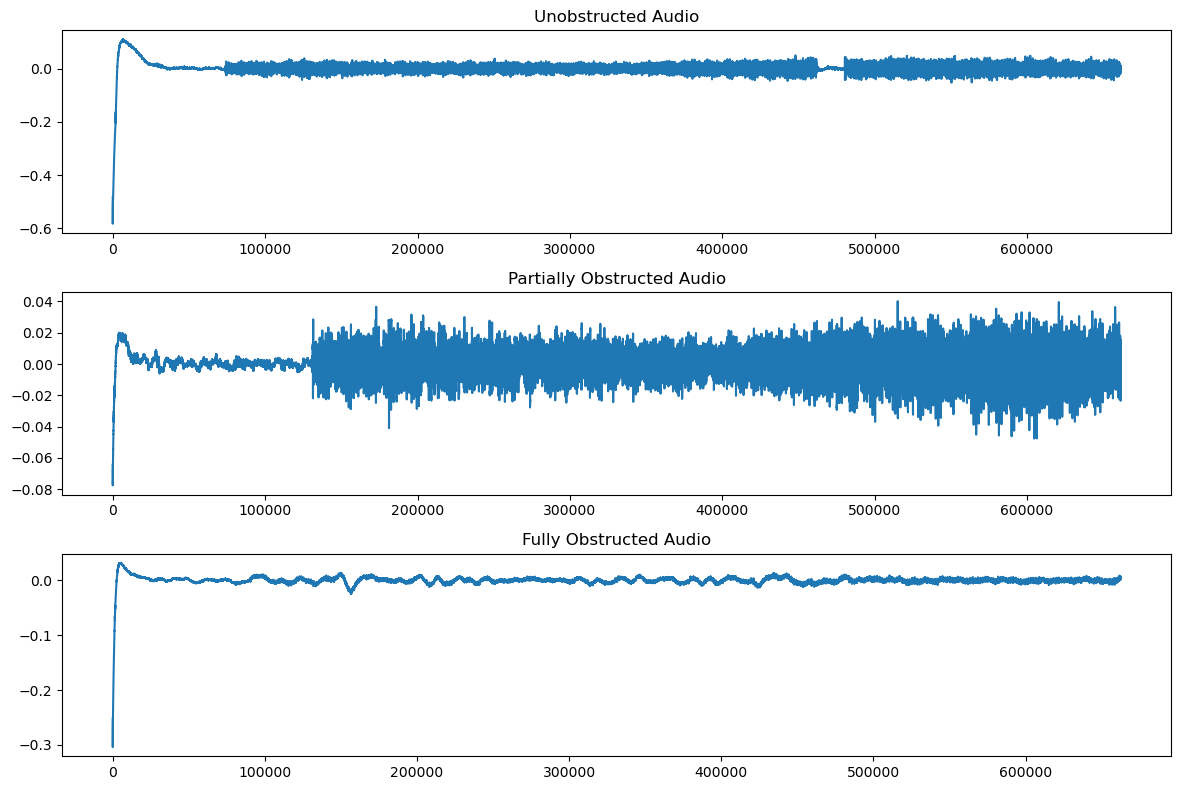

In [2]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(unobstructed)
plt.title('Unobstructed Audio')

plt.subplot(3, 1, 2)
plt.plot(partially_obstructed)
plt.title('Partially Obstructed Audio')

plt.subplot(3, 1, 3)
plt.plot(fully_obstructed)
plt.title('Fully Obstructed Audio')

plt.tight_layout()
plt.show()


In [3]:
# Function to compute RMS value of an audio signal
def compute_rms(audio_signal):
    return np.sqrt(np.mean(audio_signal**2))

# Compute RMS for each recording
rms_unobstructed = compute_rms(unobstructed)
rms_partially = compute_rms(partially_obstructed)
rms_fully = compute_rms(fully_obstructed)

print("RMS Values:")
print(f"Unobstructed: {rms_unobstructed:.4f}")
print(f"Partially Obstructed: {rms_partially:.4f}")
print(f"Fully Obstructed: {rms_fully:.4f}")

# Function to compute attenuation in decibels
def compute_attenuation(reference_rms, target_rms):
    return 20 * np.log10(target_rms / reference_rms)

attenuation_partially_dB = compute_attenuation(rms_unobstructed, rms_partially)
attenuation_fully_dB = compute_attenuation(rms_unobstructed, rms_fully)

print("\nAttenuation (relative to unobstructed):")
print(f"Partially Obstructed: {attenuation_partially_dB:.2f} dB")
print(f"Fully Obstructed: {attenuation_fully_dB:.2f} dB")


RMS Values:
Unobstructed: 0.0255
Partially Obstructed: 0.0086
Fully Obstructed: 0.0093

Attenuation (relative to unobstructed):
Partially Obstructed: -9.47 dB
Fully Obstructed: -8.77 dB


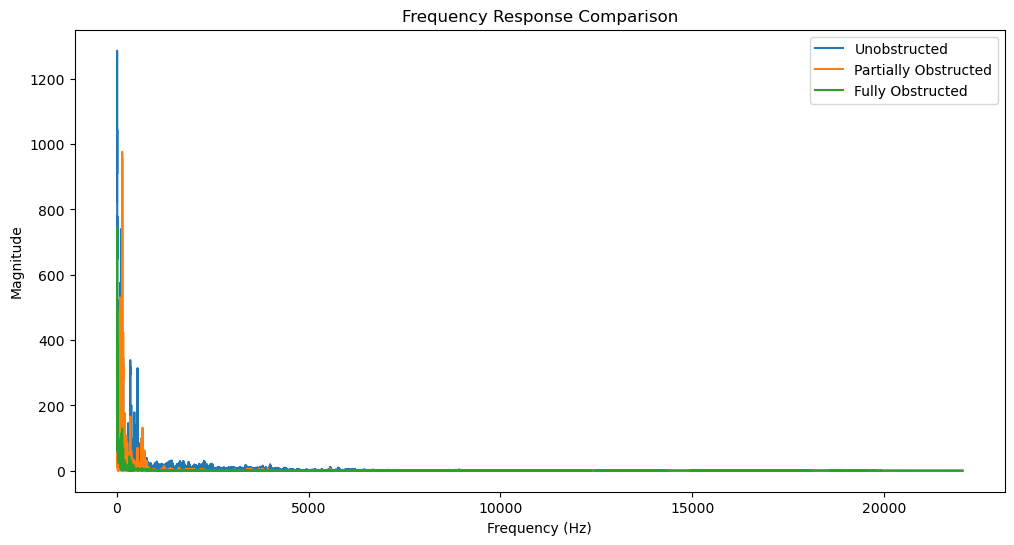

In [4]:
def plot_fft(signal, sr, label):
    fft_signal = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), 1/sr)
    fft_magnitude = np.abs(fft_signal)
    half_idx = len(freqs) // 2  # Use only the positive frequencies
    plt.plot(freqs[:half_idx], fft_magnitude[:half_idx], label=label)

plt.figure(figsize=(12, 6))
plot_fft(unobstructed, sr, 'Unobstructed')
plot_fft(partially_obstructed, sr, 'Partially Obstructed')
plot_fft(fully_obstructed, sr, 'Fully Obstructed')
plt.title("Frequency Response Comparison")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()


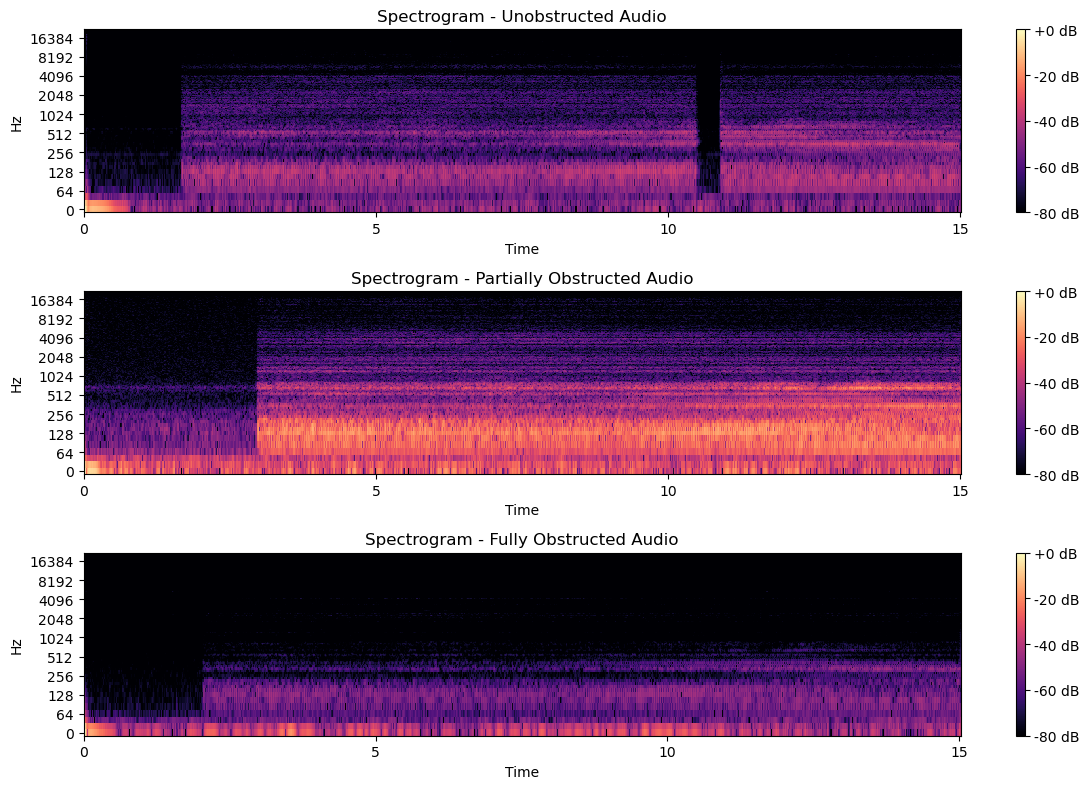

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
D_unobs = np.abs(librosa.stft(unobstructed))
librosa.display.specshow(librosa.amplitude_to_db(D_unobs, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
plt.title('Spectrogram - Unobstructed Audio')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 1, 2)
D_partial = np.abs(librosa.stft(partially_obstructed))
librosa.display.specshow(librosa.amplitude_to_db(D_partial, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
plt.title('Spectrogram - Partially Obstructed Audio')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 1, 3)
D_full = np.abs(librosa.stft(fully_obstructed))
librosa.display.specshow(librosa.amplitude_to_db(D_full, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
plt.title('Spectrogram - Fully Obstructed Audio')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()
